In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Constants

In [3]:
TOKEN_SPAM_PROB_FILE = 'SpamData/03_Testing/prob-spam.txt'
TOKEN_HAM_PROB_FILE = 'SpamData/03_Testing/prob-nonspam.txt'
TOKEN_ALL_PROB_FILE = 'SpamData/03_Testing/prob-all-tokens.txt'

TEST_FEATURE_MATRIX = 'SpamData/03_Testing/test-features.txt'
TEST_TARGET_FILE = 'SpamData/03_Testing/test-target.txt'

VOCAB_SIZE = 2500

## Load the Data

In [6]:
# Features
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter=' ')

# Target
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter=' ')

# Token probabilities
prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter=' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter=' ')
prob_token_all = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter=' ')

In [7]:
X_test[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Calculating the Joint Probabilities 
#### The Dot Product

In [14]:
a = np.array([1,2,3,4])
b = np.array([2,4,6,8])
print('a = ', a)
print('b = ', b)
print(a.shape)

a =  [1 2 3 4]
b =  [2 4 6 8]
(4,)


In [9]:
a.dot(b)

60

In [15]:
c= np.array([[0,6], [3, 5], [9,2], [8,3]])
print('shape of c is', c.shape)
print(c)

shape of c is (4, 2)
[[0 6]
 [3 5]
 [9 2]
 [8 3]]


In [20]:
print(a.dot(c))
print('shape of a.c is', (a.dot(c).shape))

[65 34]
shape of a.c is (2,)


**Challenge:** Figure out the dimensions of the dot product between X_test and prob_token_spam

In [21]:
X_test.shape

(5739, 2500)

In [22]:
prob_token_spam.shape

(2500,)

In [24]:
X_test.dot(prob_token_spam).shape

(5739,)

## Set the Prior

$$P(Spam \, | \, X) = \frac{P(X \, | \, Spam)\, P(Spam)}{P(X)}$$

In [26]:
PROB_SPAM = 0.3116 # from previous data

**Challenge:** Calculate the log prob. of the tokens given that the email was spam. This was stored in prob_token_spam 

In [28]:
np.log(prob_token_spam)

array([ -4.70510889,  -5.32152228,  -4.98519763, ...,  -9.06126015,
        -9.89416927, -10.81046   ])

## Joint Probability in Log format

In [42]:
joint_log_spam = X_test.dot(np.log(prob_token_spam) - np.log(prob_token_all)) + np.log(PROB_SPAM)
joint_log_spam[:5]

array([-1.16603496, -1.16603496, -1.16603496, -1.16603496, -1.16603496])

**Challenge:** Calculate the log prob. that the emails are non-spam given thier tokens. Store the result in a variable called joint_log_ham

$$P(Ham \, | \, X) = \frac{P(X \, | \, Ham)\, (1- P(Spam))}{P(X)}$$

In [37]:
joint_log_ham = X_test.dot(np.log(prob_token_ham) - np.log(prob_token_all)) + np.log(1 - PROB_SPAM)
joint_log_ham[:5]

array([-0.37338521, -0.37338521, -0.37338521, -0.37338521, -0.37338521])

In [38]:
joint_log_ham.size

5739

## Making Predictions
### Checking for the higher joint prob
$$P(Spam \, | \,X) \, > \, P(Ham \, | \, X)$$
**<center>OR</center>**
$$P(Spam \, | \,X) \, < \, P(Ham \, | \, X)$$

**Challenge:** Create the vector of predictions, our $\hat y$? Remember the spam emails should have the value 1 (true) and non-spam emails should have the value 0 (false). Store your results in a variable called prediction

In [40]:
prediction = joint_log_spam > joint_log_ham
prediction[-5:]

array([False, False, False, False, False])

In [41]:
y_test[-5:]

array([0., 0., 0., 0., 0.])

## Simplify

$$P(X \, | \, Spam) \, P(Spam) != \frac{P(X \, | \, Spam) \, P(Spam)}{P(X)}$$

In [43]:
joint_log_spam = X_test.dot(np.log(prob_token_spam)) + np.log(PROB_SPAM)
joint_log_ham = X_test.dot(np.log(prob_token_ham)) + np.log(1 - PROB_SPAM)

## Metrics and Evaluation

### Accuracy

In [47]:
correct_docs = (y_test == prediction).sum()
print('Docs classified correctly', correct_docs)

wrong_docs = X_test.shape[0] - correct_doc
print('Docs classified incorrectly:', wrong_docs)

Docs classified correctly 5150
Docs classified incorrectly: 589


In [48]:
# Accuracy

correct_docs/len(X_test)

0.8973688795957484

In [50]:
fraction_wrong = wrong_docs/len(X_test)
print('Fraction classified incorrectly is {:2%}'.format(fraction_wrong))
print('Fraction classified correctly is {:2%}'.format(1- fraction_wrong))

Fraction classified incorrectly is 10.263112%
Fraction classified correctly is 89.736888%


## Visualizing our Results

In [97]:
# Chart styling info
yaxis_label = 'P(X | Spam)'
xaxis_label = 'P(X | Nonspam)'

linedata = np.linspace(start=-14000, stop=1, num=1000)

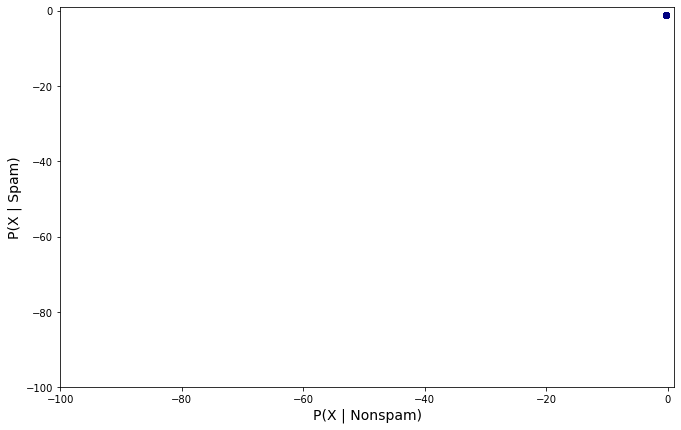

In [82]:
plt.figure(figsize=(11, 7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

#set scale
plt.xlim([-100, 1])
plt.ylim([-100, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy')
plt.show()

## The Decision Boundary

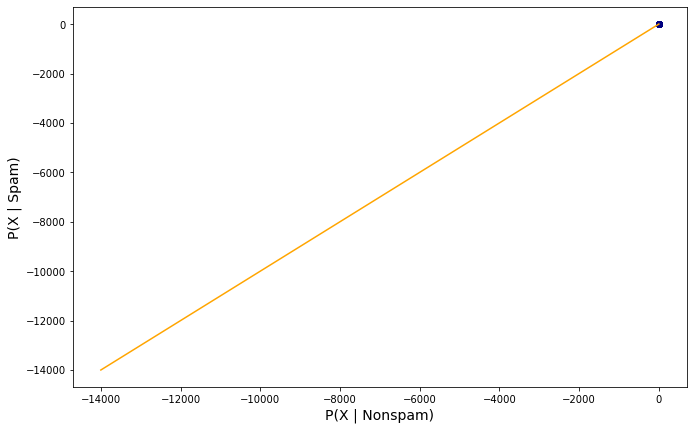

In [103]:
plt.figure(figsize=(11, 7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

#set scale
#plt.xlim([-140, 1])
#plt.ylim([-140, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=25)
plt.plot(linedata, linedata, color='orange')

plt.show()